## Laboratorio de Clustering: K-means y Aglomerativo

### Fecha: 12-Mayo-2023
### Sergio Diaz

--------------------------


### Librerias

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Libreria para gráficas
import seaborn as sns

# Libreria para generar datos
from sklearn.datasets import make_blobs
# Libreria para el escalado de variables
from sklearn.preprocessing import scale
# Libreria para las funciones de distancia
from sklearn.metrics import pairwise_distances
# Librería para K-Means
from sklearn.cluster import KMeans
# Libreria para generar el dendograma
from scipy.cluster.hierarchy import dendrogram, linkage
# Libreria para el agrupamiento Aglomerativo
from sklearn.cluster import AgglomerativeClustering
# Librería para separar los datos de entrenamiento y de pruebas
from sklearn.model_selection import train_test_split
# Libreria para normalización de datos
from sklearn.preprocessing import normalize

----------------------------------------
---------------------------------------------------------------------------------
## Ejercicio 1: K-means
Con base al conjunto de datos Iris.csv, realice las siguientes tareas:

* Escalado de las variables.
* Calcule la distancia Euclidiana.
* Imprima las 5 mejores observaciones (menor distancia).

In [25]:
# Se cargan los datos
datos = pd.read_csv("data/Iris.csv")
datos.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [26]:
# Se cambia el indice del DataFrame por el nombre de la especie
datos= datos.set_index('Species')
datos.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,5.1,3.5,1.4,0.2
Iris-setosa,2,4.9,3.0,1.4,0.2
Iris-setosa,3,4.7,3.2,1.3,0.2
Iris-setosa,4,4.6,3.1,1.5,0.2


### Solución: 

In [27]:
# Escalado de las variables
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
Iris-setosa,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
Iris-setosa,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
Iris-setosa,-1.651258,-1.506521,0.106445,-1.284407,-1.312977


In [28]:
# Cálculo de distancias
print('------------------')
print('Distancia Euclídiana')
print('------------------')
distancias = pairwise_distances(
                X = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.iloc[:4,:4]

------------------
Distancia Euclídiana
------------------


Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
Species,,,,
Iris-setosa,NaN,NaN,NaN,NaN
Iris-setosa,1.182347,NaN,NaN,NaN
Iris-setosa,0.849823,0.526007,NaN,NaN
Iris-setosa,1.109880,0.437092,0.285827,NaN


In [29]:
# Observaciones más similares
distancias.melt(ignore_index=False, var_name="caracteristica_b", value_name='distancia') \
    .rename_axis("caracteristica_a") \
    .reset_index() \
    .sort_values('distancia') \
    .dropna()

,caracteristica_a,caracteristica_b,distancia
5137,Iris-setosa,Iris-setosa,0.069284
12081,Iris-versicolor,Iris-versicolor,0.145094
19332,Iris-virginica,Iris-virginica,0.160682
4534,Iris-setosa,Iris-setosa,0.209127
4078,Iris-setosa,Iris-setosa,0.239404
...,...,...,...
1331,Iris-virginica,Iris-setosa,6.638989
2368,Iris-virginica,Iris-setosa,6.674564
2081,Iris-virginica,Iris-setosa,6.723417
6267,Iris-virginica,Iris-setosa,6.769953


------------------------------------------------
## Ejercicio 2: K-means
Con base al set de datos Iris.csv, realice las siguientes tareas:

* Aplique el método del códo para identificar la cantidad de clusters.
* Realice la predicción K-means y utilice el número de clusters identificado en el método del codo.
* Visualice los grupos.

### Solución: 

In [30]:
# Se cargan los datos
data = pd.read_csv("data/Iris.csv")
data.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


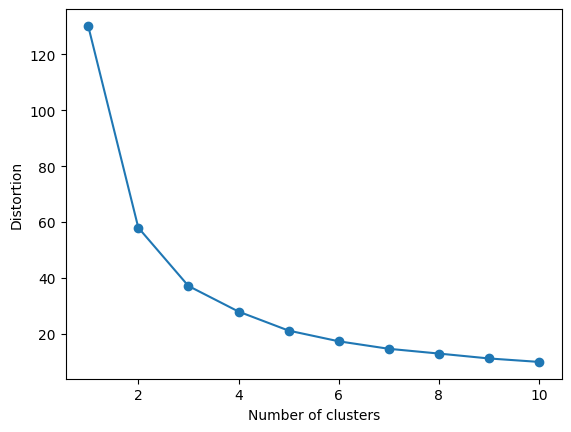

In [31]:
# Calcula la distorción para el rango de K cluster
columns= ['SepalLengthCm','SepalWidthCm']
X = data[columns].values
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# Se genera la gráfica del codo
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [32]:
# Se crea y entrena el modelo
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

# Se genera a predicción
y_predict = km.fit_predict(X)

y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

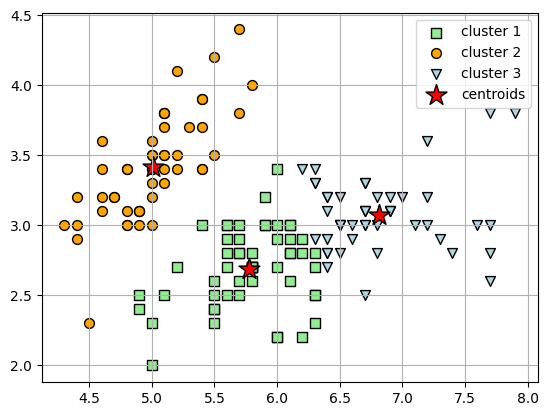

In [33]:
# Se genera la gráfica para los tres grupos
# Cluster 1
plt.scatter(
    X[y_predict == 0, 0], X[y_predict == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
# Cluster 2
plt.scatter(
    X[y_predict == 1, 0], X[y_predict == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
# Cluster 3
plt.scatter(
    X[y_predict == 2, 0], X[y_predict == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Se grafican los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

-----------------------------------------------------
## Ejercicio 3: Aglomerativo
Teniendo en cuenta la creación de datos, dendograma y AgglomerativeClustering realice las siguientes tareas:

* Genere 150 datos aleatorios con 3 centros y 3 características
* Utilice la función scipy para generar el dendograma
* Ahora utilice el algoritmo AgglomerativeClustering, realice la predicción y genera la respectiva gráfica de los grupos

### Solución:

In [34]:
# Se generan 150 ejemplos
X, y = make_blobs(n_samples=150, centers=3, n_features=3)

# Se cargan en un DataFrame
data = pd.DataFrame(X, y)
# Se cambia el nombre de las columnas
data = data.rename(columns={0:"X1", 1:"X2", 2:"X3"})

data.head()

,X1,X2,X3
1,-9.365235,9.555966,3.035006
2,-5.357851,0.405818,0.929212
2,-6.253956,0.915110,1.853745
2,-5.377074,1.461753,0.003582
1,-9.208520,6.589435,3.628644


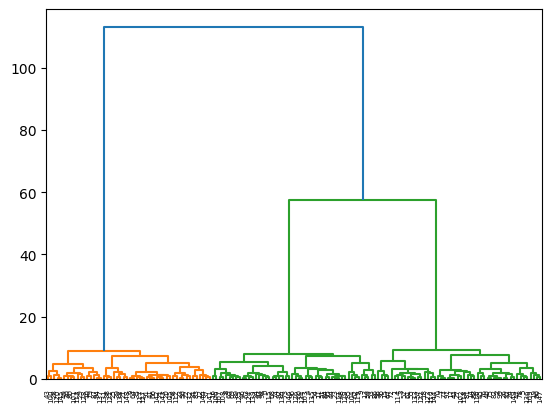

In [35]:
# Se crea el dendograma
dendograma = dendrogram(linkage(data, method='ward', metric='euclidean'))

c:\Users\Sergio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


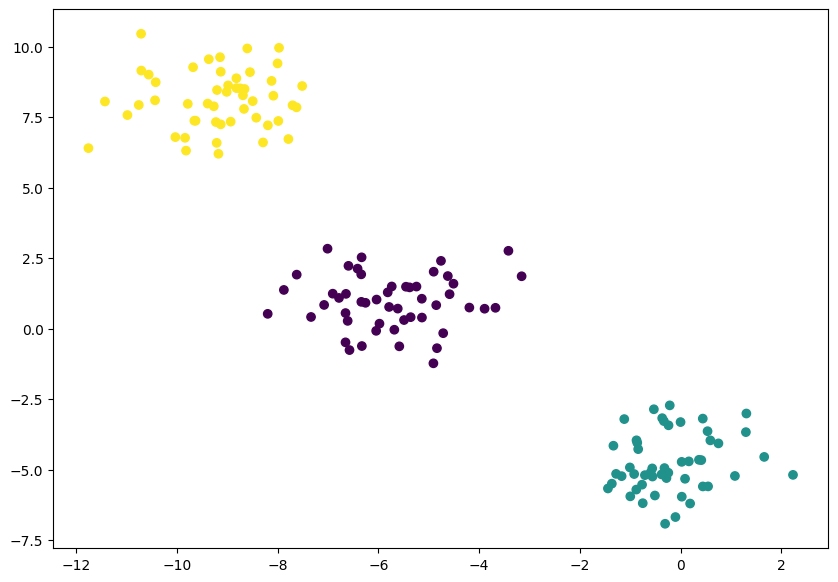

In [36]:
ac = AgglomerativeClustering(n_clusters=3, linkage='ward',affinity='euclidean')
ac.fit_predict(data)

colores =  ac.labels_
plt.figure(figsize=(10,7))
plt.scatter(data['X1'], data['X2'], c=colores)

------------------------------------------------------
## Ejercicio 4: Aglomerativo

Use AgglomerativeClustering de sklearn para agrupar el conjunto de datos make_blobs. Use 3 grupos y enlace como 'ward'.

In [37]:
# Se generan los datos aleatorios
X, y = make_blobs(n_samples = 1000, random_state=8)

# Se crea un DataFrame con los datos generados
data = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'Y':y})

### Solución: 

In [38]:
#TAREA 2 AGREGAR AGLOMERATIVO
# Aplicar algoritmo de clustering aglomerativo
clustering = AgglomerativeClustering(n_clusters=3)
predicciones = clustering.fit_predict(X)

# Agregar columna "aglomerativo" al DataFrame
data['aglomerativo'] = predicciones
data

,X0,X1,Y,aglomerativo
0,8.622185,1.935796,1,0
1,-4.736710,-7.970958,2,1
2,9.621222,0.925423,1,0
3,6.162095,-0.273254,1,0
4,8.697488,-1.057452,1,0
...,...,...,...,...
995,8.993880,2.203768,1,0
996,-5.082768,-9.644539,2,1
997,-6.252268,-8.412482,2,1
998,-5.479154,-10.536955,2,1


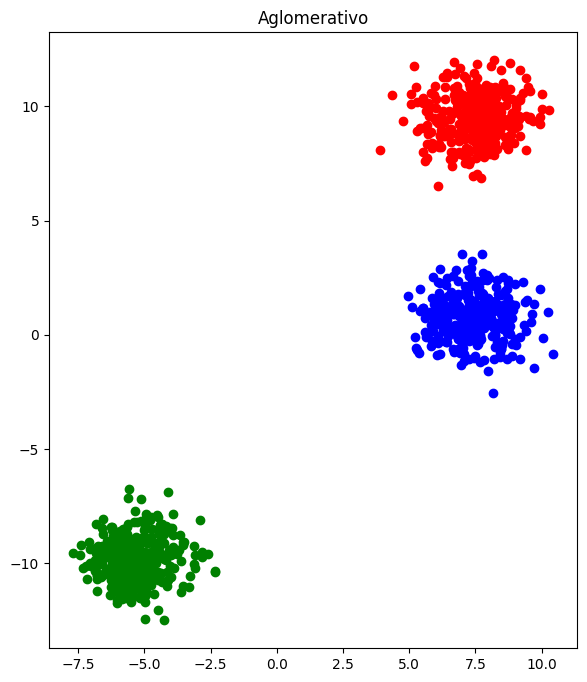

In [39]:
plt.figure(figsize=(15, 8))

# Datos originales
plt.subplot(1,2,1)
plt.title('Aglomerativo')
plt.scatter(X[y==0,0], X[y==0,1], c='red', marker='o')
plt.scatter(X[y==1,0], X[y==1,1], c='blue', marker='o')
plt.scatter(X[y==2,0], X[y==2,1], c='green', marker='o')

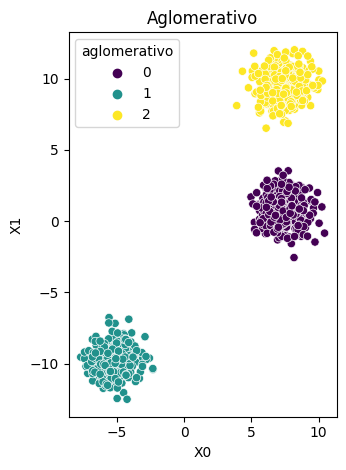

In [40]:
# Usar Seaborn para resaltar los puntos por clúster
plt.subplot(1,2,2)
plt.title('Aglomerativo')
sns.scatterplot(x='X0', y='X1', hue='aglomerativo', data=data, palette='viridis')

plt.tight_layout()
plt.show()

----------------------------------------------------
Ejercicio 5: Aglomerativo

En este ejercicio, use el conjunto de datos de iris después de la división de prueba de entrenamiento, agrupe el conjunto de datos usando AgglomerativeClustering de la biblioteca sklearn. Arregle la mejor opción de vinculación después de probar diferentes opciones.

In [41]:
# Se cargan los datos
iris = pd.read_csv('data/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
# Se definen las características del modelo
caracteristicas = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

# Se separan los datos 80% entrenamiento y 20% para pruebas
iris_train, iris_test = train_test_split(iris, train_size = 0.8)

### Solución: 

In [43]:
# Aplicar algoritmo de clustering aglomerativo
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean').fit(iris_train[caracteristicas])


X = clustering.labels_
X

c:\Users\Sergio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 1,
       0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2,
       0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [44]:
# Crear una columna "Cluster" en iris_train y asignarle los valores de clustering.labels_
iris_train['Cluster'] = clustering.labels_[:len(iris_train)]

iris_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
138,139,6.0,3.0,4.8,1.8,Iris-virginica,0
72,73,6.3,2.5,4.9,1.5,Iris-versicolor,0
125,126,7.2,3.2,6.0,1.8,Iris-virginica,2
139,140,6.9,3.1,5.4,2.1,Iris-virginica,2
106,107,4.9,2.5,4.5,1.7,Iris-virginica,0
...,...,...,...,...,...,...,...
58,59,6.6,2.9,4.6,1.3,Iris-versicolor,0
91,92,6.1,3.0,4.6,1.4,Iris-versicolor,0
85,86,6.0,3.4,4.5,1.6,Iris-versicolor,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1


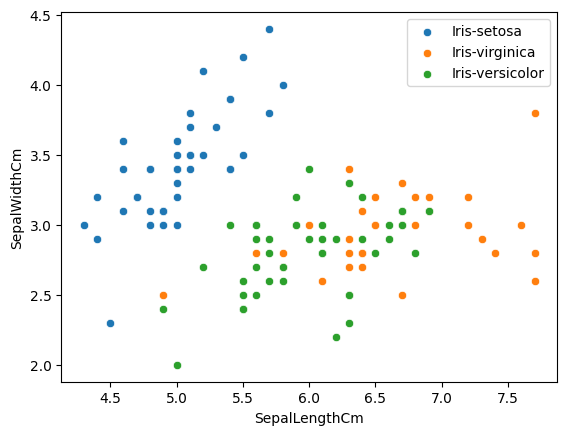

In [45]:
# Filtrar los datos de iris_train por especies
setosa_data = iris_train[iris_train['Species'] == 'Iris-setosa']
virginica_data = iris_train[iris_train['Species'] == 'Iris-virginica']
versicolor_data = iris_train[iris_train['Species'] == 'Iris-versicolor']

# Graficar los datos utilizando Seaborn
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=setosa_data, label='Iris-setosa')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=virginica_data, label='Iris-virginica')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=versicolor_data, label='Iris-versicolor')

# Mostrar la gráfica
plt.legend()
plt.show()